#  Data Augmentation Notebook 

### - This notebook will analyze the different methods of data augmentation for the image. 

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

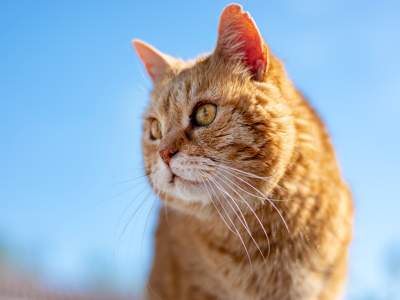

In [3]:
image = Image.open(sample_img_path).resize((400, 300)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

# Part One: The Flip

### > 한번 flip_left_right, 
### > 두번 flip_up_down

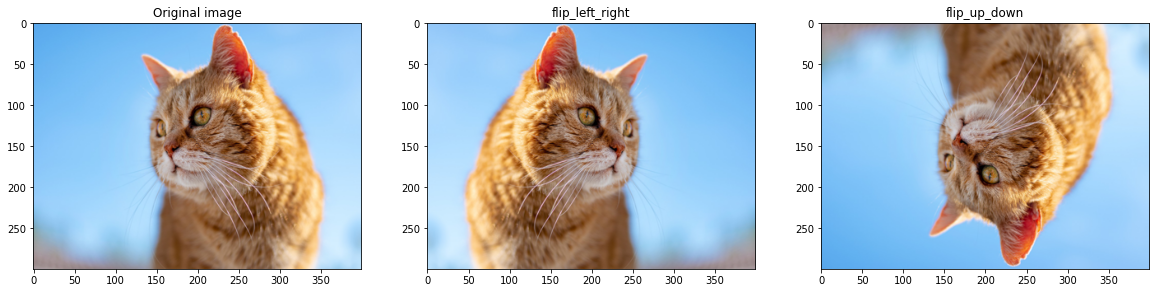

In [7]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(20, 20))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

#여기는 말했드시 flOPPY Flip Left RighT~
plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

#여기서 말했드시 flippy flop UP DOWN ㅋㅋ
plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

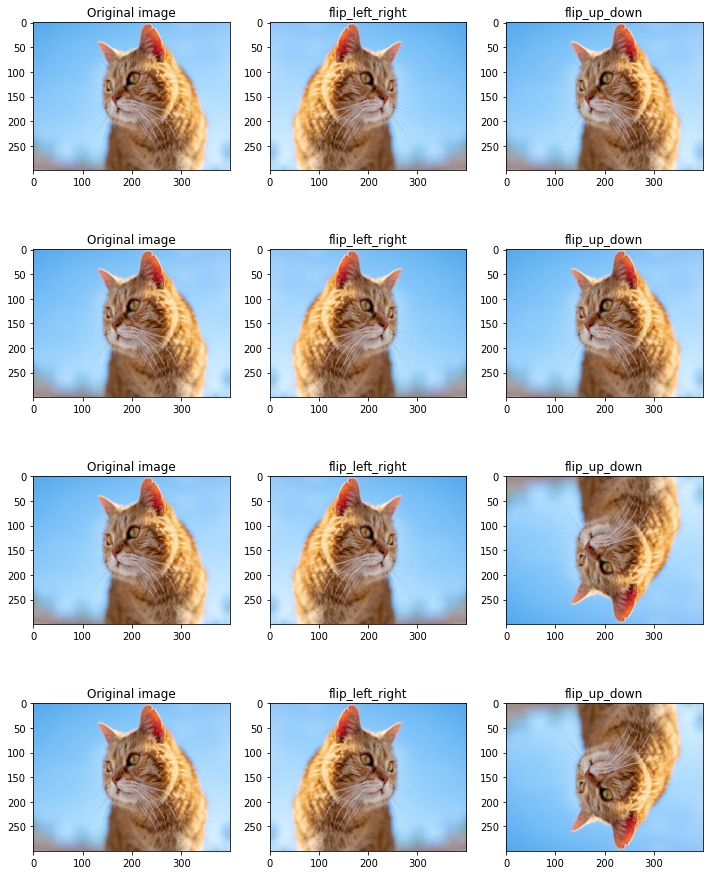

In [9]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

# Part Two: Center Crop 
### >보이다 시피 중앙에 있는 기준으로 확대화 한다. 

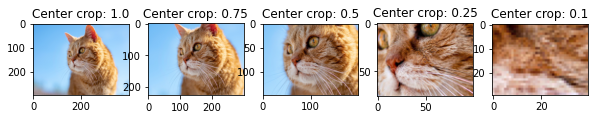

In [10]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [11]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

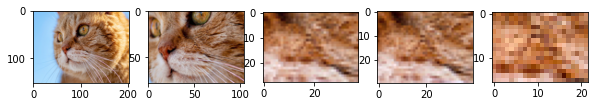

In [12]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

# Part Three: Random CROP

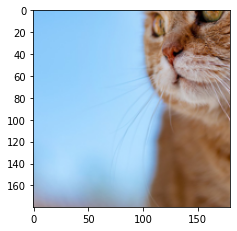

In [13]:
#이걸 사용하면 아무 RANDOM CROP CAT 사진에 작용된다
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

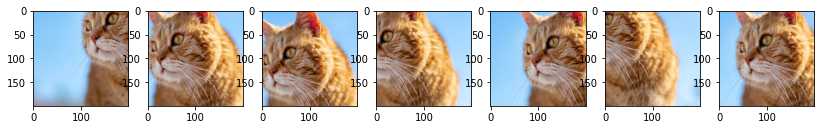

In [17]:
# 여기서 나와있는건 random crop CAT 사진 7개. lucky seven!
plt.figure(figsize=(14, 18))
for i in range(7):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,7,i+1)
  plt.imshow(random_crop_image)

# Part Four: 밝기 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


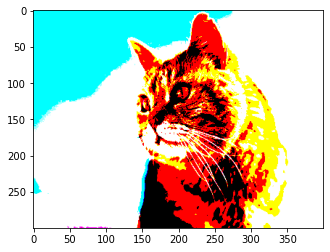

In [24]:
# apply brightness towards the CAT 사진 
cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
plt.imshow(cropped_tensor)

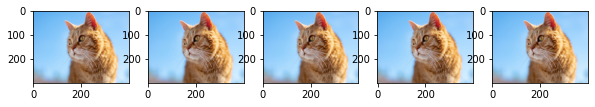

In [32]:
# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

# Part Five: IMGAUG 라이브러리 

In [33]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)  

## Part 5.1: Affine
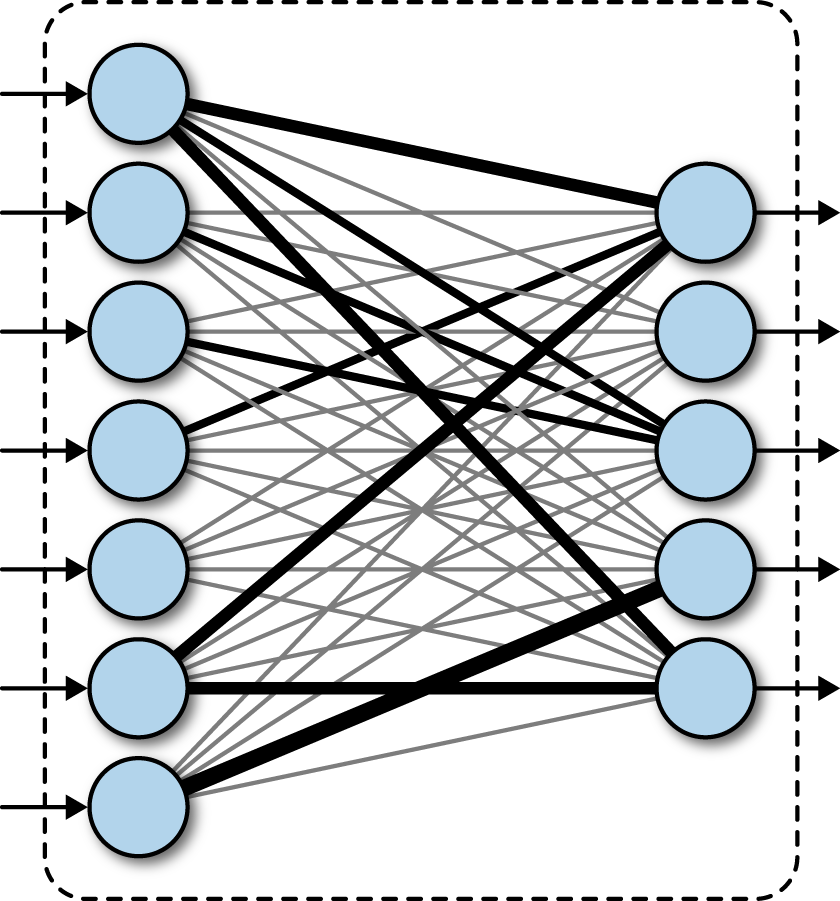
### -> Affine Layer 

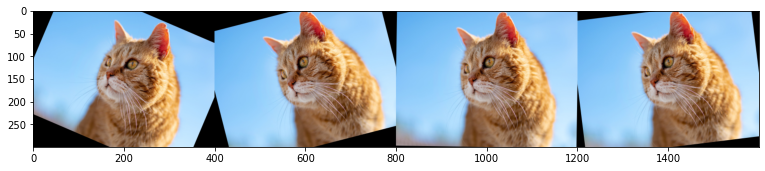

In [34]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))  # -25도와 25도 사이에서 랜덤하게 각도 변환
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

## Part 5.2: CROP

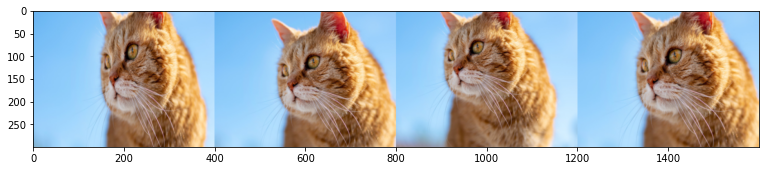

In [35]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

## Part 5.3: Sequential

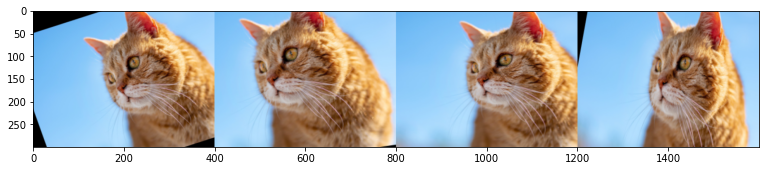

In [36]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

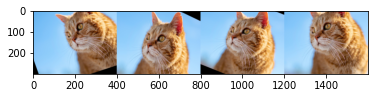

In [37]:
# modify iaa.sequential to use random step
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)
plt.imshow(np.hstack(images_aug))

## Part 5.4: OneOf

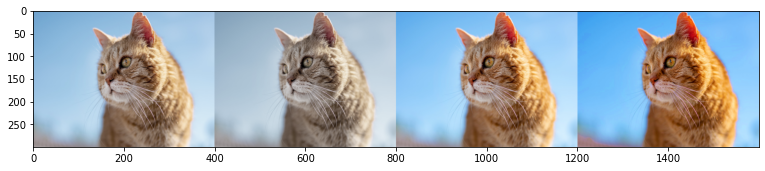

In [38]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))


## Part 5.5: Sometimes 

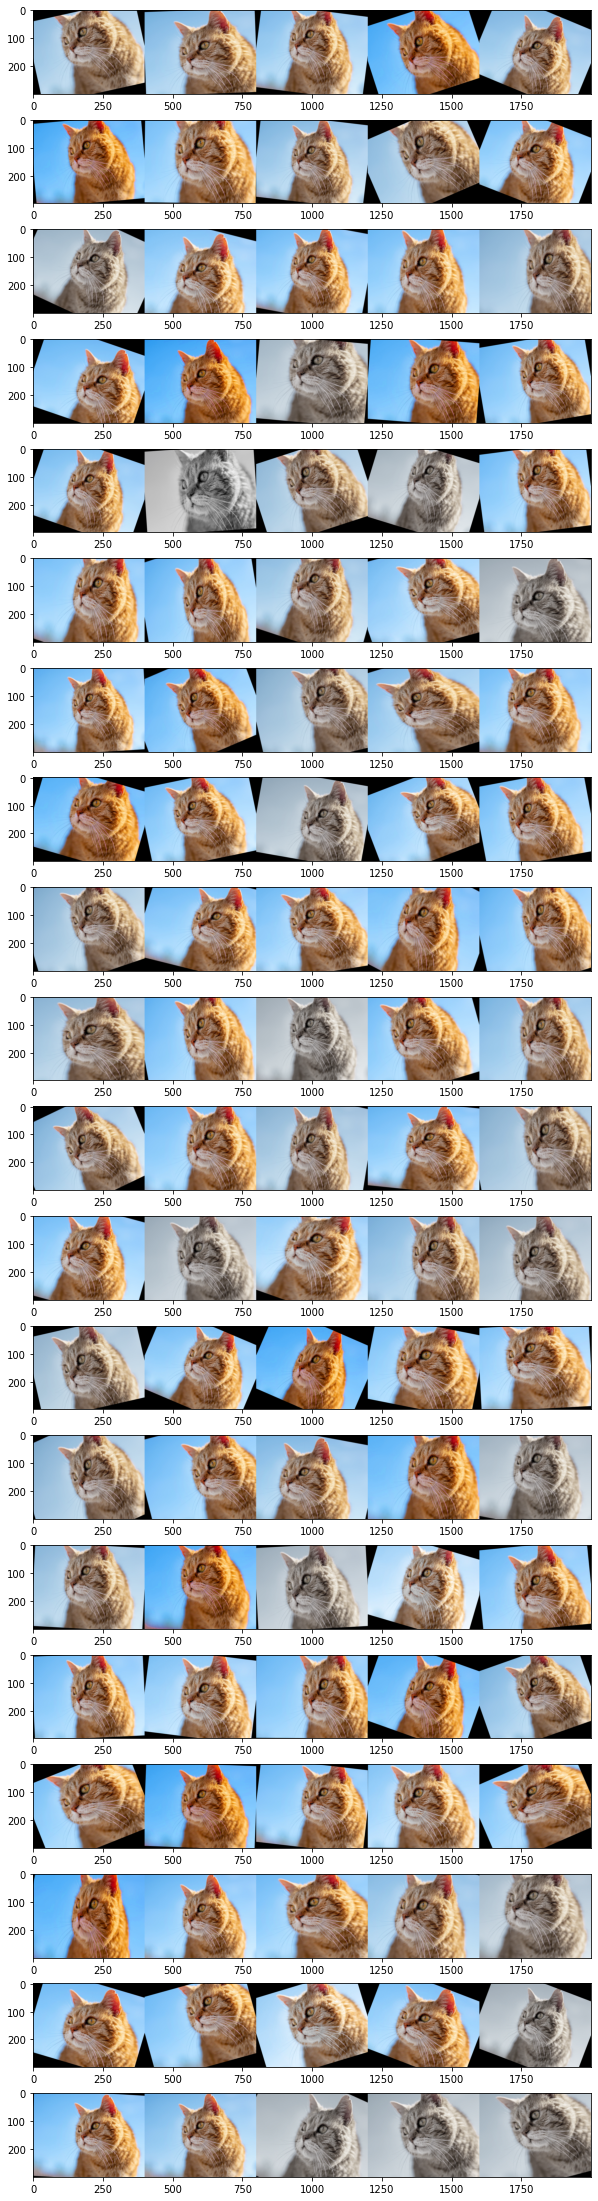

In [39]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()
